In [1]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from keras import models
from keras import layers
from keras import regularizers
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from keras.utils import to_categorical

Using TensorFlow backend.


In [2]:
iris = datasets.load_iris()

In [3]:
X = iris.data[:,:3]
y = iris.target

In [4]:
print(X.shape, y.shape)

(150, 3) (150,)


In [5]:
y = to_categorical(y)

In [6]:
y.shape

(150, 3)

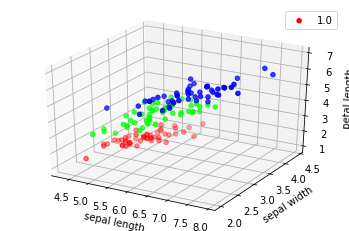

In [7]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(X[:,0], X[:,1], X[:, 2], c=y, cmap=plt.cm.Set1)
ax.set_xlabel('sepal length')
ax.set_ylabel('sepal width')
ax.set_zlabel('petal length')
# ax.plot(y,)
plt.legend(y[0])
plt.legend(y[1])
plt.legend(y[2])
plt.show()

In [8]:
train_data, test_data, train_target, test_target = train_test_split(X, y, shuffle=True, test_size=0.2)

In [9]:
print(train_data.shape, test_data.shape)

(120, 3) (30, 3)


In [10]:
normalized_train = np.zeros(train_data.shape)
normalized_test = np.zeros(test_data.shape)
for i in range(train_data.shape[1]):
    avg = np.mean(train_data[:,i])
    std = np.std(train_data[:,i])
    normalized_train[:,i] = (train_data[:,i]-avg)/std
    normalized_test[:,i] = (test_data[:,i]-avg)/std
    
print(normalized_train.shape, normalized_test.shape)

(120, 3) (30, 3)


In [11]:
model = models.Sequential()
model.add(layers.Dense(8, activation='relu', input_shape=(normalized_train.shape[1],)))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(8))
model.add(layers.Dense(8))
model.add(layers.Dense(8))
model.add(layers.Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(normalized_train, train_target, epochs=100, batch_size=4, validation_split=0.1, shuffle=True)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 108 samples, validate on 12 samples
Epoch 1/100
108/108 [==============================] - 0s 4ms/step - loss: 1.2304 - acc: 0.2870 - val_loss: 1.1542 - val_acc: 0.0833
Epoch 2/100
108/108 [==============================] - 0s 249us/step - loss: 1.0896 - acc: 0.3796 - val_loss: 0.9458 - val_acc: 0.5833
Epoch 3/100
108/108 [==============================] - 0s 231us/step - loss: 0.9714 - acc: 0.6296 - val_loss: 0.7786 - val_acc: 0.8333
Epoch 4/100
108/108 [==============================] - 0s 314us/step - loss: 0.8315 - acc: 0.7222 - val_loss: 0.6175 - val_acc: 0.8333
Epoch 5/100
108/108 [==============================] - 0s 304us/step - loss: 0.7162 - acc: 0.7500 - val_loss: 0.4832 - val_acc: 0.8333
Epoch 6/100
108/108 [==========================

Epoch 54/100
108/108 [==============================] - 0s 268us/step - loss: 0.2118 - acc: 0.8981 - val_loss: 0.0450 - val_acc: 1.0000
Epoch 55/100
108/108 [==============================] - 0s 246us/step - loss: 0.1031 - acc: 0.9444 - val_loss: 0.0199 - val_acc: 1.0000
Epoch 56/100
108/108 [==============================] - 0s 231us/step - loss: 0.1070 - acc: 0.9630 - val_loss: 0.0342 - val_acc: 1.0000
Epoch 57/100
108/108 [==============================] - 0s 268us/step - loss: 0.1702 - acc: 0.9259 - val_loss: 0.0283 - val_acc: 1.0000
Epoch 58/100
108/108 [==============================] - 0s 259us/step - loss: 0.1027 - acc: 0.9630 - val_loss: 0.0266 - val_acc: 1.0000
Epoch 59/100
108/108 [==============================] - 0s 268us/step - loss: 0.1364 - acc: 0.9352 - val_loss: 0.0275 - val_acc: 1.0000
Epoch 60/100
108/108 [==============================] - 0s 231us/step - loss: 0.0937 - acc: 0.9537 - val_loss: 0.0241 - val_acc: 1.0000
Epoch 61/100
108/108 [==========================

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 32        
_________________________________________________________________
dropout_1 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 27        
Total params: 275
Trainable params: 275
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.evaluate(normalized_test, test_target)

30/30 [==============================] - 0s 33us/step


[0.19455745816230774, 0.9666666388511658]

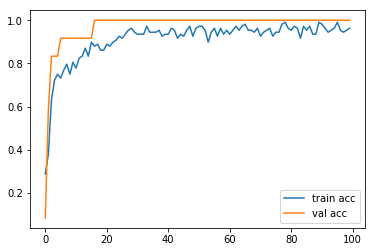

In [14]:
plt.plot(history.history['acc'], label='train acc')
plt.plot(history.history['val_acc'], label='val acc')
plt.legend()

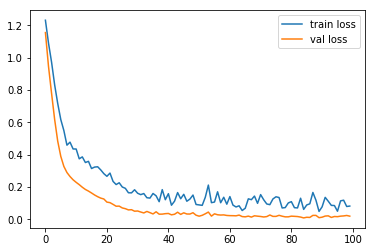

In [15]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()